# Processing with sklearn

In [145]:
import pandas as pd

df = pd.read_csv(r'dataset\preprocess.csv')
df.head()

,Rating,Description,label,text clean,tokens,stop,stemmed
0,5,Klenteng Ban Hin Kiong merupakan Klenteng tert...,1,klenteng ban hin kiong merupakan klenteng tert...,"['klenteng', 'ban', 'hin', 'kiong', 'merupakan...","['klenteng', 'ban', 'hin', 'kiong', 'merupakan...","['klenteng', 'ban', 'hin', 'kiong', 'rupa', 'k..."
1,5,Airnya sejuk. Tempatnya bebas plastik. Bagi ya...,1,airnya sejuk tempatnya bebas plastik bagi yang...,"['airnya', 'sejuk', 'tempatnya', 'bebas', 'pla...","['airnya', 'sejuk', 'tempatnya', 'bebas', 'pla...","['air', 'sejuk', 'tempat', 'bebas', 'plastik',..."
2,5,Tiap minggu pasti kesini buat foto2 doang😁 kar...,1,tiap minggu pasti kesini buat foto doang😁 kare...,"['tiap', 'minggu', 'pasti', 'kesini', 'buat', ...","['tiap', 'minggu', 'kesini', 'buat', 'foto', '...","['tiap', 'minggu', 'kesini', 'buat', 'foto', '..."
3,5,"Pernah kesana pergi liat bunker jepang, naik p...",1,pernah kesana pergi liat bunker jepang naik pe...,"['pernah', 'kesana', 'pergi', 'liat', 'bunker'...","['pernah', 'kesana', 'pergi', 'liat', 'bunker'...","['pernah', 'kesana', 'pergi', 'liat', 'bunker'..."
4,5,"Mengikuti Talkshow "" Menyingkap Pesona Wastra ...",1,mengikuti talkshow menyingkap pesona wastra i...,"['mengikuti', 'talkshow', 'menyingkap', 'peson...","['mengikuti', 'talkshow', 'menyingkap', 'peson...","['ikut', 'talkshow', 'singkap', 'pesona', 'was..."


In [146]:
df = df[['label', 'stemmed']]
df.head()

,label,stemmed
0,1,"['klenteng', 'ban', 'hin', 'kiong', 'rupa', 'k..."
1,1,"['air', 'sejuk', 'tempat', 'bebas', 'plastik',..."
2,1,"['tiap', 'minggu', 'kesini', 'buat', 'foto', '..."
3,1,"['pernah', 'kesana', 'pergi', 'liat', 'bunker'..."
4,1,"['ikut', 'talkshow', 'singkap', 'pesona', 'was..."


In [147]:
df['stemmed'] = df['stemmed'].astype(str)

In [148]:
df['label'].value_counts()

label
0    446
1    320
Name: count, dtype: int64

In [149]:
s_1 = df[df['label']==0].sample(383, replace=True)
s_2 = df[df['label']==1].sample(383, replace=True)
df = pd.concat([s_1, s_2])

print(df.shape)
print(df['label'].value_counts(normalize=True))

(766, 2)
label
0    0.5
1    0.5
Name: proportion, dtype: float64


In [150]:
text = df['stemmed']
label = df['label']

In [151]:
# SPLIT DATA
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=30, stratify=label)


In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features based on your dataset
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## SVM

In [153]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear')

In [154]:
clf.fit(X_train_tfidf,y_train)
predict = clf.predict(X_test_tfidf)

In [155]:
from sklearn.metrics import classification_report, confusion_matrix


print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        77
           1       0.80      0.84      0.82        77

    accuracy                           0.82       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.82      0.82      0.82       154



In [156]:
# confusion matrix
conf_matrix = confusion_matrix(y_test,predict)
print(conf_matrix)

[[61 16]
 [12 65]]


<Axes: >

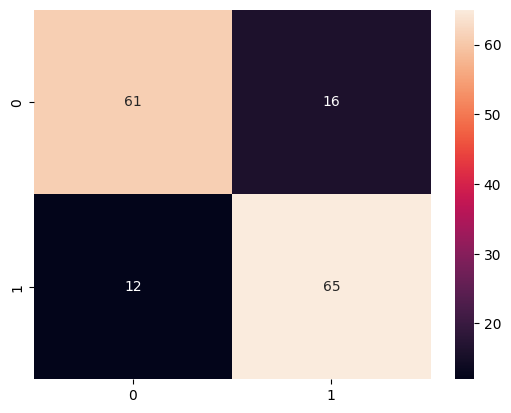

In [157]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True)

## TEST NEW DATA

In [158]:
import re
import string
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


def cleansing(kalimat):
    kalimat = str(kalimat)

    # membuat huruf jadi lowercase
    lower_case = kalimat.lower()

    # menghapus angka dari kalimat
    hasil = re.sub(r"\d+","", lower_case)

    # menghapus tanda baca dari kalimat
    hasil = hasil.translate(str.maketrans("","",string.punctuation))

    # menghapus spasi diawal dan diakhir kalimat
    hasil = hasil.strip()

    # remove new line
    hasil = hasil.replace("\n", "")


    return hasil

def proses(data):
    data = cleansing(data)

    #hapus stopwords
    factory = StopWordRemoverFactory()
    stopwords = factory.create_stop_word_remover()
    data = stopwords.remove(data)

    #stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)

    # tf idf vectorizer
    data = vectorizer.transform([data])

    return data

In [159]:
review_positif = 'pantai ini bagus untuk keluarga dan nyaman sekali'
review_negatif = 'sangat kotor dan tidak baik'

In [160]:
clf.predict(proses(review_positif))

array([1], dtype=int64)

In [161]:
clf.predict(proses(review_negatif))

array([0], dtype=int64)